In [140]:
%pwd

'/Users/sven/gh/fullstack-ml-academy-homework/notepads/05-Explorative-Datenanalyse'

## Descriptive Statistics

### Lageparameter
- Arithmetisches Mittel / Durchschnitt / average
- Getrimmtes Mittel / truncated mean
- Gewichtetes Mittel / weighted arithmetic mean
- Median

### Streuungsmaße
- Spannweite / range
- Mittlere Absolute Abweichung / mean absolute deviation
- Varianz / variance
- Standardabweichung / standard deviation
- Quantil, Perzentil, Quartil
- Interquartilsabstand / Spannweite vom Perzentil 25 zum Perzentil 75 / interquartil range
- Variationskoeffizient
- Empirischer Quartilsdispersionskoeffizient

### Verteilungen
- Boxplot
- Histogram
- Dichtediagramm

### Zusammenhangmaße
- Korrelationskoeffizient
- Korrelationsmatrix
- Streudiagramm
- Streudiagramm-Matrix
- Predictive Power Score


In [141]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Polygon
import pandas as pd
import numpy as np
from scipy import stats
import ppscore as pps


In [142]:
from inspect import signature


def curry(fn):
    """
    Decorator to curry any function.

    Parameters
    ----------
    f : function
        A function to curry.

    Returns
    -------
    fn(...) : object
        The result or a curried function. Depending on the number of parameters given.
    """
    num_args = len(signature(fn).parameters)
    def init(*args, **kwargs):
      def call(*more_args, **more_kwargs):
        all_args = args + more_args
        all_kwargs = dict(**kwargs, **more_kwargs)
        if len(all_args) + len(all_kwargs) >= num_args:
          return fn(*all_args, **all_kwargs)
        else:
          return init(*all_args, **all_kwargs)
      return call
    return init()

In [143]:
pd.options.display.float_format = '{:.0f}'.format
data = pd.read_csv("../../data/Census-Datensatz.csv", sep=';', skipinitialspace=True)

df = data.copy()

df.drop(['fnlwgt'],axis=1,inplace=True)

#cleaning string in object columns
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = df[i].str.strip()


In [144]:
df.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,NaN,9,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,39,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,1078,87,40,NaN,NaN
std,14,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,7385,403,12,NaN,NaN
min,17,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0,0,1,NaN,NaN
25%,28,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,0,0,40,NaN,NaN
50%,37,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,0,0,40,NaN,NaN
75%,48,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,0,0,45,NaN,NaN


In [145]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [146]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

In [147]:
def is_greater_than_zero(x: int) -> bool:
    b: bool = x > 0
    return b

@curry
def as_int(f, x) -> int:
    """
    Effectively int(f(x)).

    Parameters
    ----------
    f : function
        A function to call.
    x : object
        Value to pass to the function f as the only parameter.

    Returns
    -------
    int(f(x)) : int
        The result as an int.
    """
    y = f(x)
    return int(y)

is_greater_than_zero_as_int = as_int(is_greater_than_zero)

df['capital_gain_present'] = df['capital-gain'].map(is_greater_than_zero_as_int)
df['capital_loss_present'] = df['capital-loss'].map(is_greater_than_zero_as_int)
df = df.assign(capital_gain_and_loss_present=lambda x: x.capital_gain_present & x.capital_loss_present)

df.describe(percentiles=[.05, .10, .25, .5, .75, .90, .95, .96, .97, .98, .99])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   age                            32561 non-null  int64 
 1   workclass                      32561 non-null  object
 2   education                      32561 non-null  object
 3   education-num                  32561 non-null  int64 
 4   marital-status                 32561 non-null  object
 5   occupation                     32561 non-null  object
 6   relationship                   32561 non-null  object
 7   race                           32561 non-null  object
 8   sex                            32561 non-null  object
 9   capital-gain                   32561 non-null  int64 
 10  capital-loss                   32561 non-null  int64 
 11  hours-per-week                 32561 non-null  int64 
 12  native-country                 32561 non-null  object
 13  i

In [148]:
df['capital_gain_present'].value_counts()

0    29849
1     2712
Name: capital_gain_present, dtype: int64

In [149]:
df['capital_loss_present'].value_counts()

0    31042
1     1519
Name: capital_loss_present, dtype: int64

In [150]:
df['capital_gain_and_loss_present'].value_counts()

0    32561
Name: capital_gain_and_loss_present, dtype: int64

In [151]:
# retain only some of the numeric columns
numeric_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
df_numeric = df[numeric_columns]
# add column income_cat
income_column = ['income']
income_data = df[income_column]
income_data_codes = income_data.income.astype('category').cat.codes
df_numeric['income-cat'] = income_data_codes
# sort by age
df_sorted = df_numeric.sort_values(by='capital-gain', ascending=True)
# ensure datatype int32
df_int = df_sorted.astype('int32')
# data_int.describe(percentiles=[.05, .10, .25, .5, .75, .90, .95, .96, .97, .98, .99]).apply('{:.0f}'.format)
# raises error with message unsupported format string passed to Series.__format__
# so instead we use pd.options.display.float_format = '{:.0f}'.format right after importing pandas
df_int.describe(include='all', percentiles=[.05, .10, .25, .5, .75, .90, .95, .96, .97, .98, .99])

/var/folders/h2/lkcg_8md1x38x9b_fv91s7pw0000gn/T/ipykernel_5588/3782906034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['income-cat'] = income_data_codes


,age,capital-gain,capital-loss,hours-per-week,income-cat
count,32561,32561,32561,32561,32561
mean,39,1078,87,40,0
std,14,7385,403,12,0
min,17,0,0,1,0
5%,19,0,0,18,0
10%,22,0,0,24,0
25%,28,0,0,40,0
50%,37,0,0,40,0
75%,48,0,0,45,0
90%,58,0,0,55,1


In [152]:
print(df_int.median(numeric_only=True))

age              37
capital-gain      0
capital-loss      0
hours-per-week   40
income-cat        0
dtype: float64


In [153]:
print(df_int.mean(numeric_only=True))

age                39
capital-gain     1078
capital-loss       87
hours-per-week     40
income-cat          0
dtype: float64


In [154]:
print(df_int.mode(numeric_only=True, dropna=True))

   age  capital-gain  capital-loss  hours-per-week  income-cat
0   36             0             0              40           0


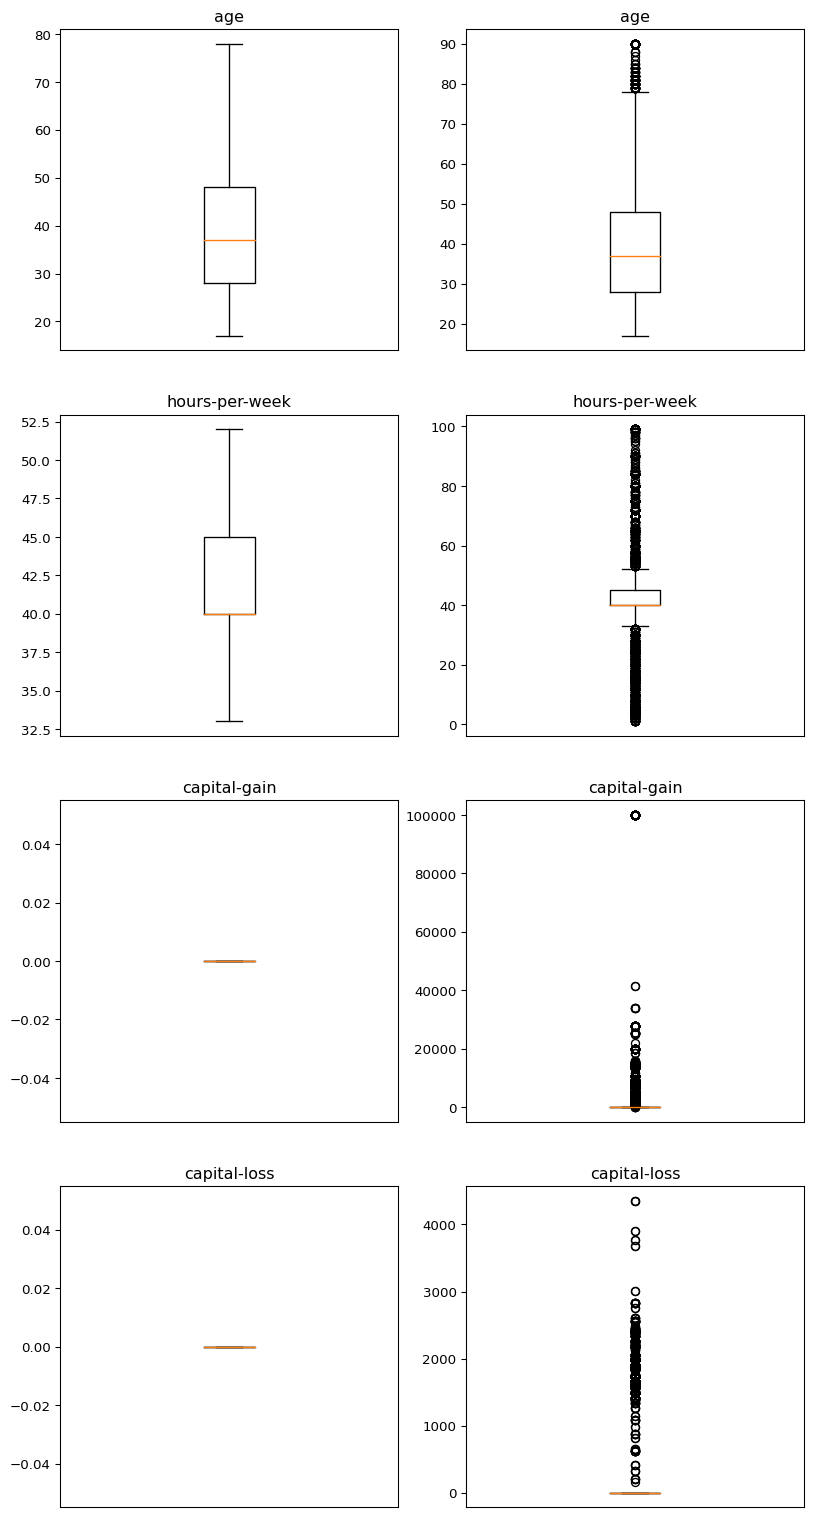

In [155]:
fig, axs = plt.subplots(4, 2)

axs[0, 0].boxplot(df_int['age'], showfliers=False)
axs[0, 0].set_title('age')
axs[0, 1].boxplot(df_int['age'], showfliers=True)
axs[0, 1].set_title('age')
axs[1, 0].boxplot(df_int['hours-per-week'], showfliers=False)
axs[1, 0].set_title('hours-per-week')
axs[1, 1].boxplot(df_int['hours-per-week'], showfliers=True)
axs[1, 1].set_title('hours-per-week')
axs[2, 0].boxplot(df_int['capital-gain'], showfliers=False)
axs[2, 0].set_title('capital-gain')
axs[2, 1].boxplot(df_int['capital-gain'], showfliers=True)
axs[2, 1].set_title('capital-gain')
axs[3, 0].boxplot(df_int['capital-loss'], showfliers=False)
axs[3, 0].set_title('capital-loss')
axs[3, 1].boxplot(df_int['capital-loss'], showfliers=True)
axs[3, 1].set_title('capital-loss')

for ax in axs.ravel():
    #ax.set_xticks([])
    ax.xaxis.set_major_locator(plt.NullLocator())

fig.set_size_inches(10.0, 20.0)
fig.set_dpi(96.0)


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='capital-gain', ylabel='age'>,
        <Axes: xlabel='capital-loss', ylabel='age'>,
        <Axes: xlabel='hours-per-week', ylabel='age'>,
        <Axes: xlabel='income-cat', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='capital-gain'>,
        <Axes: xlabel='capital-gain', ylabel='capital-gain'>,
        <Axes: xlabel='capital-loss', ylabel='capital-gain'>,
        <Axes: xlabel='hours-per-week', ylabel='capital-gain'>,
        <Axes: xlabel='income-cat', ylabel='capital-gain'>],
       [<Axes: xlabel='age', ylabel='capital-loss'>,
        <Axes: xlabel='capital-gain', ylabel='capital-loss'>,
        <Axes: xlabel='capital-loss', ylabel='capital-loss'>,
        <Axes: xlabel='hours-per-week', ylabel='capital-loss'>,
        <Axes: xlabel='income-cat', ylabel='capital-loss'>],
       [<Axes: xlabel='age', ylabel='hours-per-week'>,
        <Axes: xlabel='capital-gain', ylabel='hours-per-week'>,
        <Axes: xlabe

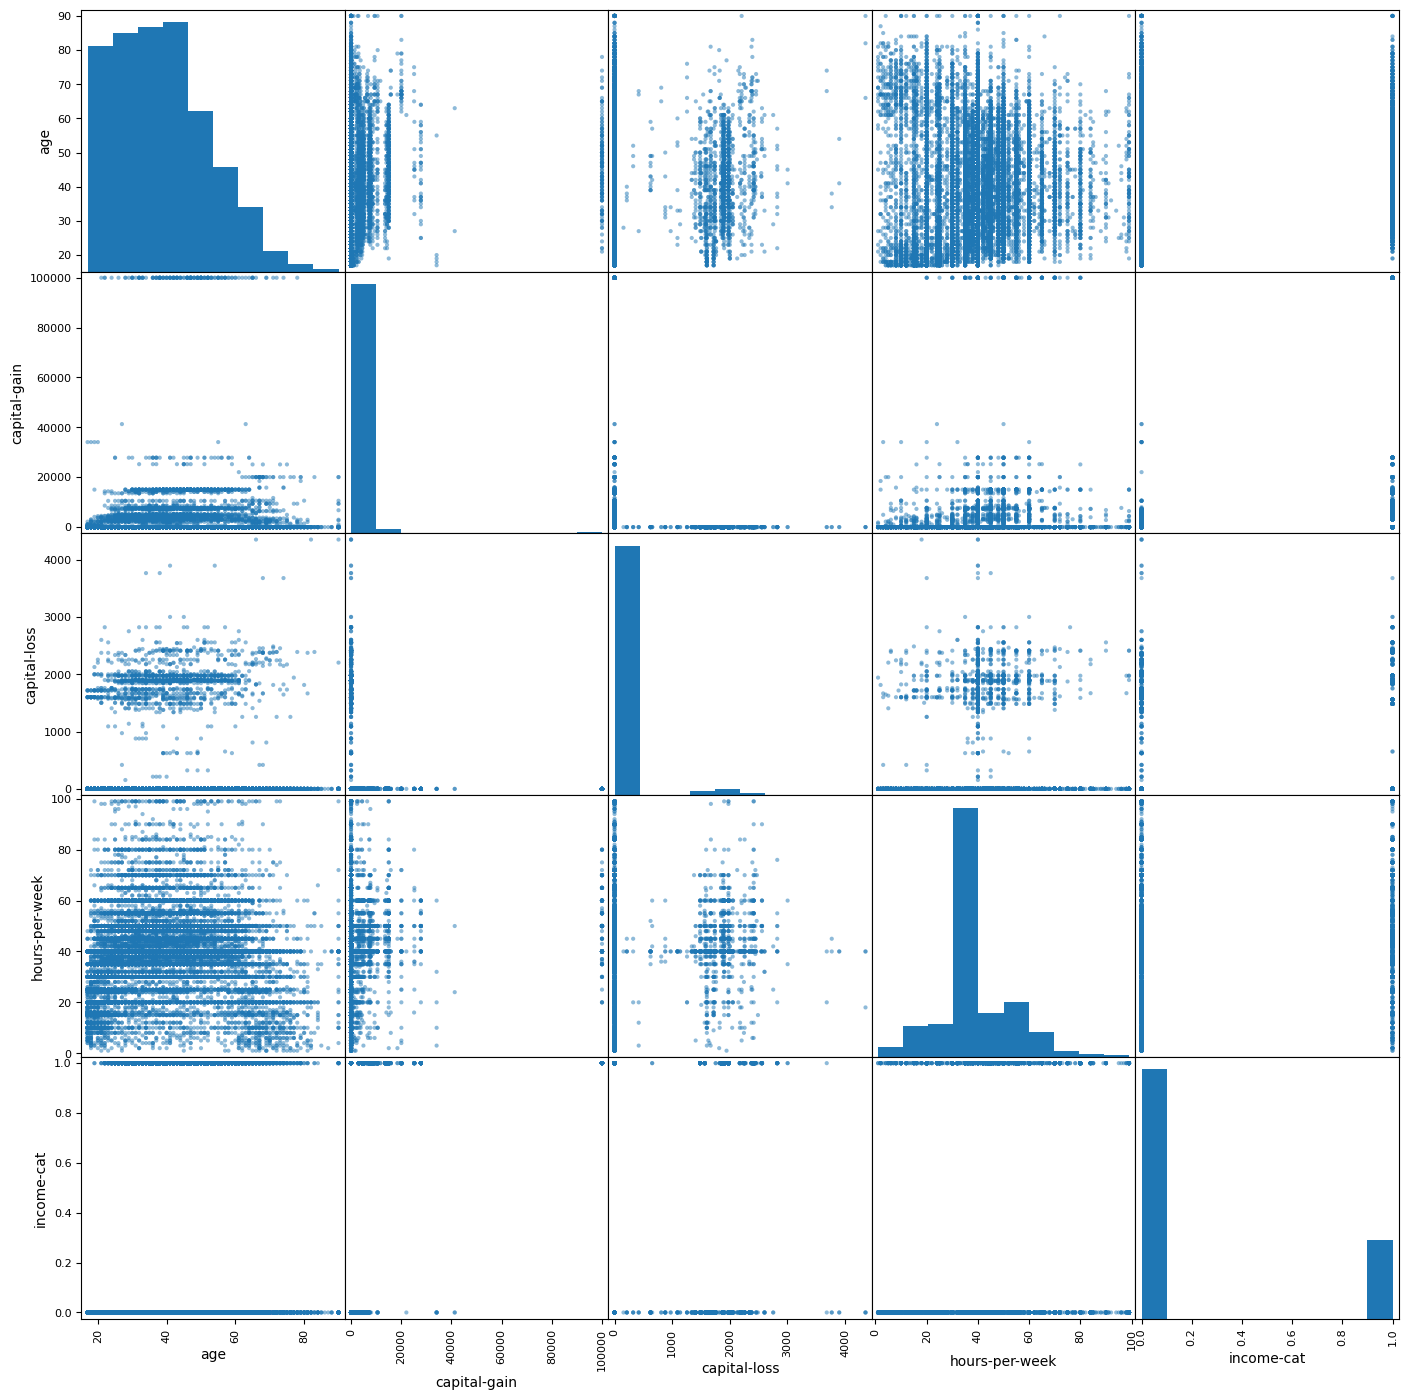

In [156]:
pd.plotting.scatter_matrix(df_int, 
                           figsize=(17, 17),
                           diagonal = 'hist')

## Insights

### hours-per-week over age
- Diverse hours per week up to 35 are more common among young and old people.
- However, e.g. exactly 20 hours per week as part-time work seems common across all age groups.

### capital-gain and capital-loss over age
- Capital gain appears to be almost independent from age.
- However, enjoying higher capital gains is more likely for people over 25 years.

### capital-loss over age
- Older people experience slightly more often higher capital losses.

### income-cat over age
- Income category >=50k is more likely for people over 25 years.

### age histogram
- Many people retire between 50 and 70 years of age.


/var/folders/h2/lkcg_8md1x38x9b_fv91s7pw0000gn/T/ipykernel_5588/3084120139.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cool'),


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='capital-gain', ylabel='age'>,
        <Axes: xlabel='capital-loss', ylabel='age'>,
        <Axes: xlabel='hours-per-week', ylabel='age'>,
        <Axes: xlabel='income-cat', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='capital-gain'>,
        <Axes: xlabel='capital-gain', ylabel='capital-gain'>,
        <Axes: xlabel='capital-loss', ylabel='capital-gain'>,
        <Axes: xlabel='hours-per-week', ylabel='capital-gain'>,
        <Axes: xlabel='income-cat', ylabel='capital-gain'>],
       [<Axes: xlabel='age', ylabel='capital-loss'>,
        <Axes: xlabel='capital-gain', ylabel='capital-loss'>,
        <Axes: xlabel='capital-loss', ylabel='capital-loss'>,
        <Axes: xlabel='hours-per-week', ylabel='capital-loss'>,
        <Axes: xlabel='income-cat', ylabel='capital-loss'>],
       [<Axes: xlabel='age', ylabel='hours-per-week'>,
        <Axes: xlabel='capital-gain', ylabel='hours-per-week'>,
        <Axes: xlabe

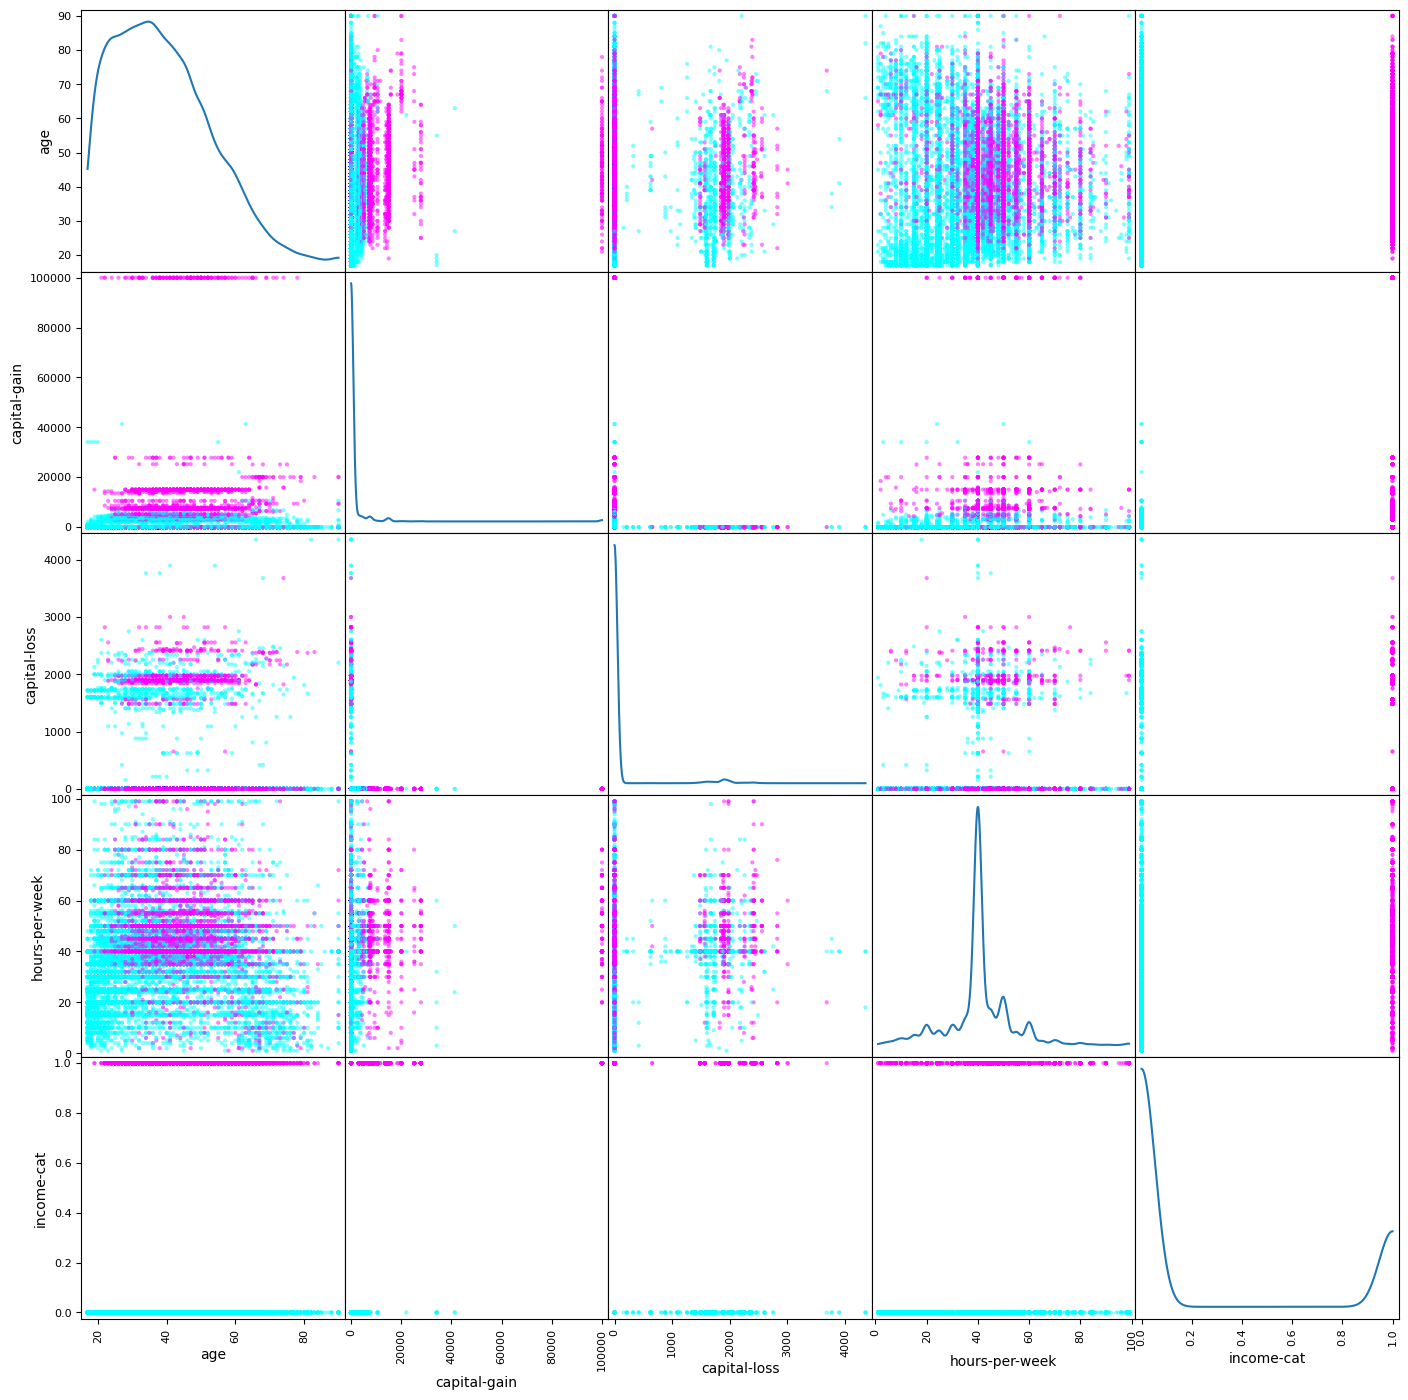

In [157]:
pd.plotting.scatter_matrix(df_int, 
                           c=df_int['income-cat'], 
                           figsize=(17, 17),
                           cmap = cm.get_cmap('cool'),
                           diagonal = 'kde')

## Insights

### hours-per-week over age colored by income-cat
- Income category >=50k is more likely for peopke with 40 or more hours per week.

### hours-per-week distribution function
- 40 hours per week are predominant.


                age  capital-gain  capital-loss  hours-per-week  income-cat
age            1.00          0.08          0.06            0.07        0.23
capital-gain   0.08          1.00         -0.03            0.08        0.22
capital-loss   0.06         -0.03          1.00            0.05        0.15
hours-per-week 0.07          0.08          0.05            1.00        0.23
income-cat     0.23          0.22          0.15            0.23        1.00


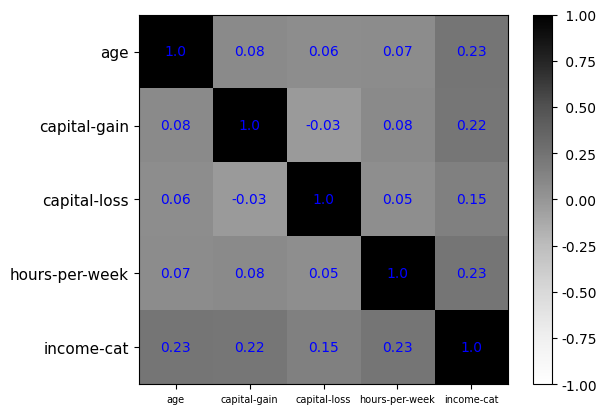

In [158]:
# Pearson product-moment correlation coefficients

pd.options.display.float_format = '{:.2f}'.format
pd_correlation_matrix = df_int.astype(dtype=float, copy=True).corr(method='pearson', numeric_only=True)
print(pd_correlation_matrix)
pd.options.display.float_format = '{:.0f}'.format

# faster with numpy
npdf = df_int.to_numpy()
np_correlation_matrix = np.corrcoef(npdf, rowvar=False).round(decimals=2)

# visualize using matplotlib
fig, ax = plt.subplots()
im = ax.imshow(np_correlation_matrix, cmap='Greys')
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=('age', 'capital-gain', 'capital-loss', 'hours-per-week', 'income-cat'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4), ticklabels=('age', 'capital-gain', 'capital-loss', 'hours-per-week', 'income-cat'))
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='x', which='minor', labelsize=6)
ax.tick_params(axis='y', which='major', labelsize=11)
ax.tick_params(axis='y', which='minor', labelsize=10)
ax.set_ylim(4.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, np_correlation_matrix[i, j], ha='center', va='center',
                color='b')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()


## Insights

### correlation matrix
- Only week linear correlations present in our consensus sample.
- It would be hard to predict the income category using some plain linear regression.

In [159]:
pd_covariance_matrix = df_int.astype(dtype=float, copy=True).cov(numeric_only=True)
pd_covariance_matrix

,age,capital-gain,capital-loss,hours-per-week,income-cat
age,186,7825,318,12,1
capital-gain,7825,54542539,-94086,7150,705
capital-loss,318,-94086,162377,270,26
hours-per-week,12,7150,270,152,1
income-cat,1,705,26,1,0


## Insights

Disclaimer: The sample mean and sample covariance are not robust statistics, meaning that they are sensitive to outliers.

### sample covariance matrix
- The negative covariance between capital gain and capital loss supposedly tells us that higher capital gains come along with lower capital losses.


In [166]:
predictive_power_score_matrix = pps.matrix(df_int.astype(float), output='df')
predictive_power_score_matrix.style.background_gradient(cmap='twilight', low=0.0, high=1.0)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,capital-gain,0.000000,regression,True,mean absolute error,1092.415400,1998.703368,DecisionTreeRegressor()
2,age,capital-loss,0.000000,regression,True,mean absolute error,86.893600,164.085553,DecisionTreeRegressor()
3,age,hours-per-week,0.000000,regression,True,mean absolute error,7.262800,7.780896,DecisionTreeRegressor()
4,age,income-cat,0.000000,regression,True,mean absolute error,0.248400,0.333963,DecisionTreeRegressor()
5,capital-gain,age,0.014053,regression,True,mean absolute error,11.040600,10.885451,DecisionTreeRegressor()
6,capital-gain,capital-gain,1.000000,predict_itself,True,None,0.000000,1.000000,None
7,capital-gain,capital-loss,0.000000,regression,True,mean absolute error,86.893600,165.101861,DecisionTreeRegressor()
8,capital-gain,hours-per-week,0.000000,regression,True,mean absolute error,7.262800,7.429225,DecisionTreeRegressor()
9,capital-gain,income-cat,0.000000,regression,True,mean absolute error,0.248400,0.312805,DecisionTreeRegressor()


In [165]:
predictive_power_score_matrix_all = pps.predictors(df, y='income', output='df')
predictive_power_score_matrix_all.style.background_gradient(cmap='twilight', low=0.0, high=1.0)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,income-cat,income,1.000000,classification,True,weighted F1,0.653115,1.000000,DecisionTreeClassifier()
1,capital-gain,income,0.297123,classification,True,weighted F1,0.653115,0.756183,DecisionTreeClassifier()
2,capital_gain_present,income,0.244023,classification,True,weighted F1,0.653115,0.737763,DecisionTreeClassifier()
3,education,income,0.243135,classification,True,weighted F1,0.653115,0.737455,DecisionTreeClassifier()
4,education-num,income,0.243135,classification,True,weighted F1,0.653115,0.737455,DecisionTreeClassifier()
5,capital-loss,income,0.141755,classification,True,weighted F1,0.653115,0.702288,DecisionTreeClassifier()
6,workclass,income,0.094056,classification,True,weighted F1,0.653115,0.685742,DecisionTreeClassifier()
7,occupation,income,0.092410,classification,True,weighted F1,0.653115,0.685171,DecisionTreeClassifier()
8,capital_loss_present,income,0.079720,classification,True,weighted F1,0.653115,0.680769,DecisionTreeClassifier()
9,hours-per-week,income,0.047278,classification,True,weighted F1,0.653115,0.669515,DecisionTreeClassifier()


In [167]:
# the following code does not work well
# since we transform the column income into a numerical column income-cat which however has only zeros and ones
# and the library ppscore therefore chooses to go with DecisionTreeRegressor instead of DecisionTreeClassifier
# and thus the calculated predictive power scores are useless

# add column income_cat
income_column_2 = ['income']
income_data_2 = df[income_column]
#print(income_data_2)
#print(income_data_2.value_counts())
income_data_codes_2 = income_data.income.astype('category').cat.codes
#print(income_data_codes_2)
#print(income_data_codes_2.value_counts())
df['income-cat'] = income_data_codes_2
#print(df)
predictive_power_score_matrix_all = pps.predictors(df, y='income-cat', output='df')
predictive_power_score_matrix_all.style.background_gradient(cmap='twilight', low=0.0, high=1.0)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,income,income-cat,1.000000,regression,True,mean absolute error,0.242400,0.000000,DecisionTreeRegressor()
1,age,income-cat,0.000000,regression,True,mean absolute error,0.242400,0.328378,DecisionTreeRegressor()
2,workclass,income-cat,0.000000,regression,True,mean absolute error,0.242400,0.356255,DecisionTreeRegressor()
3,education,income-cat,0.000000,regression,True,mean absolute error,0.242400,0.314706,DecisionTreeRegressor()
4,education-num,income-cat,0.000000,regression,True,mean absolute error,0.242400,0.314706,DecisionTreeRegressor()
5,marital-status,income-cat,0.000000,regression,True,mean absolute error,0.242400,0.292203,DecisionTreeRegressor()
6,occupation,income-cat,0.000000,regression,True,mean absolute error,0.242400,0.318016,DecisionTreeRegressor()
7,relationship,income-cat,0.000000,regression,True,mean absolute error,0.242400,0.289016,DecisionTreeRegressor()
8,race,income-cat,0.000000,regression,True,mean absolute error,0.242400,0.363225,DecisionTreeRegressor()
9,sex,income-cat,0.000000,regression,True,mean absolute error,0.242400,0.348365,DecisionTreeRegressor()


In [168]:
# here we take look at the full pps matrix
# based on the full data frame with all columns
predictive_power_score_matrix_all = pps.matrix(df, output='df')
predictive_power_score_matrix_all.style.background_gradient(cmap='twilight', low=0.0, high=1.0)

/Users/sven/gh/fullstack-ml-academy-homework/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/Users/sven/gh/fullstack-ml-academy-homework/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/Users/sven/gh/fullstack-ml-academy-homework/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/Users/sven/gh/fullstack-ml-academy-homework/.venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/Users/sven/gh/fullstack-ml-academy-homework/.venv/lib/python3.9/site-packages/s

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.011232,classification,True,weighted F1,0.579088,0.583816,DecisionTreeClassifier()
2,age,education,0.052315,classification,True,weighted F1,0.201200,0.242989,DecisionTreeClassifier()
3,age,education-num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
4,age,marital-status,0.298118,classification,True,weighted F1,0.343600,0.539285,DecisionTreeClassifier()
5,age,occupation,0.027007,classification,True,weighted F1,0.103800,0.128004,DecisionTreeClassifier()
6,age,relationship,0.199205,classification,True,weighted F1,0.268000,0.413818,DecisionTreeClassifier()
7,age,race,0.000000,classification,True,weighted F1,0.783630,0.783630,DecisionTreeClassifier()
8,age,sex,0.000000,classification,True,weighted F1,0.567200,0.555548,DecisionTreeClassifier()
9,age,capital-gain,0.000000,regression,True,mean absolute error,1093.884000,2003.391960,DecisionTreeRegressor()
